In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from datetime import datetime, timedelta
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=pd.errors.SettingWithCopyWarning)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138.00",0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344.00",1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293.00",1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,"61,223.00",0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,"64,014.00",2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,"56,981.00",0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,"69,245.00",0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Preliminary Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Menampilkan baris dengan nilai NaN
rows_with_nan = df[df.isna().any(axis=1)]
df_clean = df.dropna()
df_clean.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format = '%d-%m-%Y')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

# Data Exploration
I think hard to see these 29 column, so i will separate to some table

In [8]:
drop_column = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue', 'Response']
cust_info = df_clean.drop(drop_column, axis=1)
cust_info

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,5524,1957,Graduation,Single,"58,138.00",0,0,2012-09-04,58,0
1,2174,1954,Graduation,Single,"46,344.00",1,1,2014-03-08,38,0
2,4141,1965,Graduation,Together,"71,613.00",0,0,2013-08-21,26,0
3,6182,1984,Graduation,Together,"26,646.00",1,0,2014-02-10,26,0
4,5324,1981,PhD,Married,"58,293.00",1,0,2014-01-19,94,0
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,"61,223.00",0,1,2013-06-13,46,0
2236,4001,1946,PhD,Together,"64,014.00",2,1,2014-06-10,56,0
2237,7270,1981,Graduation,Divorced,"56,981.00",0,0,2014-01-25,91,0
2238,8235,1956,Master,Together,"69,245.00",0,1,2014-01-24,8,0


In [9]:
df_clean.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
#add ages
ages = []
for year in df_clean['Year_Birth']:
    ages.append(2025 - year)

df_clean['Age'] = ages

In [11]:
#simplify marital status
status = {"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"}
df_clean["Living_With"]=df_clean["Marital_Status"].replace(status)

In [12]:
#add children
df_clean["Children"]=df_clean["Kidhome"]+df_clean["Teenhome"]

#Family size
df_clean["family_size"] = df_clean["Living_With"].replace({"Alone": 1, "Partner":2})+ df_clean["Children"]

#Parent True or False
df_clean["is_Parent"] = np.where(df_clean.Children> 0, 1, 0)

#Segmenting education levels
df_clean["Education"]=df_clean["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Living_With,Children,family_size,is_Parent
0,5524,1957,Graduate,Single,"58,138.00",0,0,2012-09-04,58,635,...,0,0,3,11,1,68,Alone,0,1,0
1,2174,1954,Graduate,Single,"46,344.00",1,1,2014-03-08,38,11,...,0,0,3,11,0,71,Alone,2,3,1
2,4141,1965,Graduate,Together,"71,613.00",0,0,2013-08-21,26,426,...,0,0,3,11,0,60,Partner,0,2,0
3,6182,1984,Graduate,Together,"26,646.00",1,0,2014-02-10,26,11,...,0,0,3,11,0,41,Partner,1,3,1
4,5324,1981,Postgraduate,Married,"58,293.00",1,0,2014-01-19,94,173,...,0,0,3,11,0,44,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,"61,223.00",0,1,2013-06-13,46,709,...,0,0,3,11,0,58,Partner,1,3,1
2236,4001,1946,Postgraduate,Together,"64,014.00",2,1,2014-06-10,56,406,...,0,0,3,11,0,79,Partner,3,5,1
2237,7270,1981,Graduate,Divorced,"56,981.00",0,0,2014-01-25,91,908,...,0,0,3,11,0,44,Alone,0,1,0
2238,8235,1956,Postgraduate,Together,"69,245.00",0,1,2014-01-24,8,428,...,0,0,3,11,0,69,Partner,1,3,1


In [13]:
#sum all product
df_clean["Total_Spent"] = df_clean["MntWines"]+ df_clean["MntFruits"]+ df_clean["MntMeatProducts"]
+ df_clean["MntFishProducts"]+ df_clean["MntSweetProducts"]+ df_clean["MntGoldProds"]
df_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Living_With,Children,family_size,is_Parent,Total_Spent
0,5524,1957,Graduate,Single,"58,138.00",0,0,2012-09-04,58,635,...,0,3,11,1,68,Alone,0,1,0,1269
1,2174,1954,Graduate,Single,"46,344.00",1,1,2014-03-08,38,11,...,0,3,11,0,71,Alone,2,3,1,18
2,4141,1965,Graduate,Together,"71,613.00",0,0,2013-08-21,26,426,...,0,3,11,0,60,Partner,0,2,0,602
3,6182,1984,Graduate,Together,"26,646.00",1,0,2014-02-10,26,11,...,0,3,11,0,41,Partner,1,3,1,35
4,5324,1981,Postgraduate,Married,"58,293.00",1,0,2014-01-19,94,173,...,0,3,11,0,44,Partner,1,3,1,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,"61,223.00",0,1,2013-06-13,46,709,...,0,3,11,0,58,Partner,1,3,1,934
2236,4001,1946,Postgraduate,Together,"64,014.00",2,1,2014-06-10,56,406,...,0,3,11,0,79,Partner,3,5,1,436
2237,7270,1981,Graduate,Divorced,"56,981.00",0,0,2014-01-25,91,908,...,0,3,11,0,44,Alone,0,1,0,1173
2238,8235,1956,Postgraduate,Together,"69,245.00",0,1,2014-01-24,8,428,...,0,3,11,0,69,Partner,1,3,1,672


In [14]:
#number of days customer started to shop
newest_cust = df_clean.Dt_Customer.max()
days = []
for day in df_clean.Dt_Customer:
    diff = newest_cust - day
    days.append(diff)

df_clean['customer_for'] = days
df_clean['customer_for'] = df_clean['customer_for'].dt.days
df_clean


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Living_With,Children,family_size,is_Parent,Total_Spent,customer_for
0,5524,1957,Graduate,Single,"58,138.00",0,0,2012-09-04,58,635,...,3,11,1,68,Alone,0,1,0,1269,663
1,2174,1954,Graduate,Single,"46,344.00",1,1,2014-03-08,38,11,...,3,11,0,71,Alone,2,3,1,18,113
2,4141,1965,Graduate,Together,"71,613.00",0,0,2013-08-21,26,426,...,3,11,0,60,Partner,0,2,0,602,312
3,6182,1984,Graduate,Together,"26,646.00",1,0,2014-02-10,26,11,...,3,11,0,41,Partner,1,3,1,35,139
4,5324,1981,Postgraduate,Married,"58,293.00",1,0,2014-01-19,94,173,...,3,11,0,44,Partner,1,3,1,334,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,"61,223.00",0,1,2013-06-13,46,709,...,3,11,0,58,Partner,1,3,1,934,381
2236,4001,1946,Postgraduate,Together,"64,014.00",2,1,2014-06-10,56,406,...,3,11,0,79,Partner,3,5,1,436,19
2237,7270,1981,Graduate,Divorced,"56,981.00",0,0,2014-01-25,91,908,...,3,11,0,44,Alone,0,1,0,1173,155
2238,8235,1956,Postgraduate,Together,"69,245.00",0,1,2014-01-24,8,428,...,3,11,0,69,Partner,1,3,1,672,156


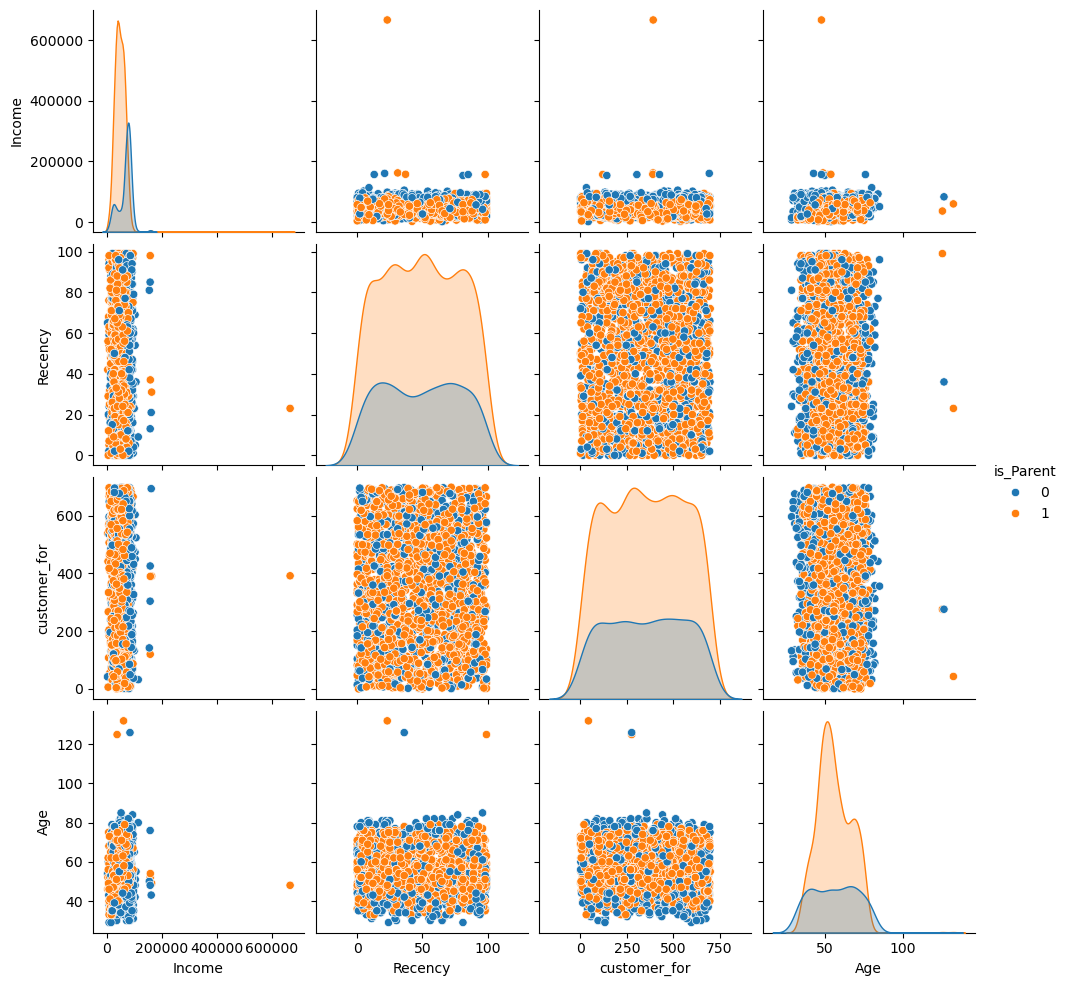

In [15]:
plot = ["Income", "Recency", "customer_for", "Age", "is_Parent"]
sns.pairplot(df_clean[plot], hue= 'is_Parent')
plt.show()

there are a few outliers

In [17]:
df_clean = df_clean[(df_clean["Age"]<90)]
df_clean = df_clean[(df_clean["Income"]<600000)]

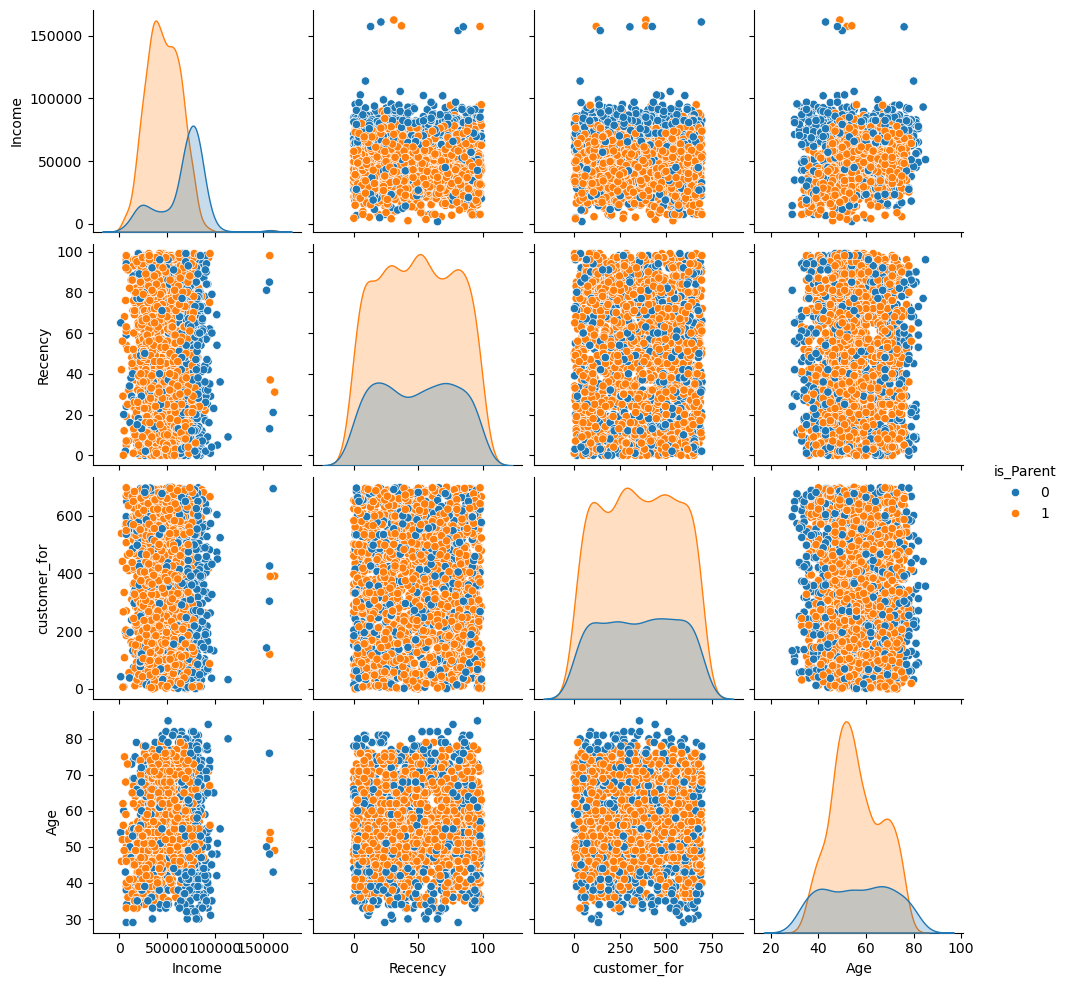

In [18]:
#lets plot again
sns.pairplot(df_clean[plot], hue= 'is_Parent')
plt.show()

it's look more beautiful right?

# Preprocessing

In [21]:
#Get list of categorical variables
s = (df_clean.dtypes == 'object')
object_categorical = list(s[s].index)

#encoding
Label=LabelEncoder()
for i in object_categorical:
    df_clean[i]=df_clean[[i]].apply(Label.fit_transform)

df_clean.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Living_With', 'Children', 'family_size', 'is_Parent',
       'Total_Spent', 'customer_for'],
      dtype='object')

In [22]:
features = ['Age', 'Income', 'Total_Spent']
X = df_clean[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.01835202,  0.28710487,  1.47824933],
       [ 1.27478522, -0.26088203, -0.92232512],
       [ 0.33453017,  0.9131964 ,  0.19832674],
       ...,
       [-1.03311355,  0.23334696,  1.29403258],
       [ 1.10382975,  0.80317156,  0.33265145],
       [ 1.27478522,  0.04229031, -0.67286495]])

D:\master program\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\master program\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\master program\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
D:\master program\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak o

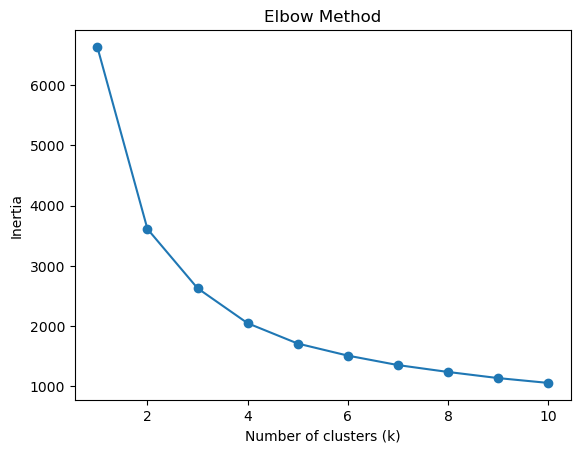

In [23]:
# Elbow Method untuk memilih jumlah cluster
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot hasil
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [24]:
# Terapkan clustering dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Lihat hasil clustering
print(df_clean[['Age', 'Income', 'Total_Spent', 'Cluster']].head())

   Age    Income  Total_Spent  Cluster
0   68 58,138.00         1269        0
1   71 46,344.00           18        2
2   60 71,613.00          602        0
3   41 26,646.00           35        1
4   44 58,293.00          334        1


D:\master program\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


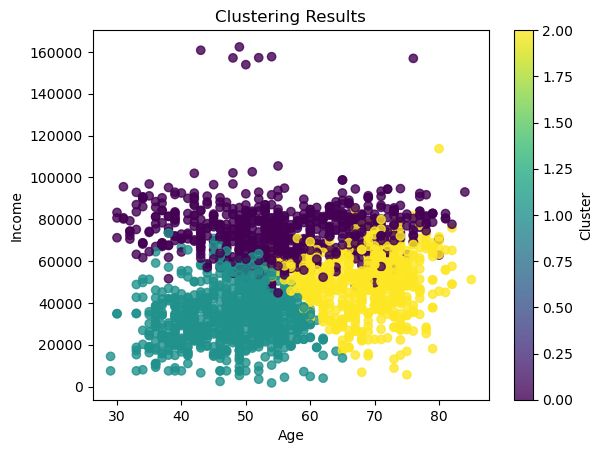

In [57]:
scatter = plt.scatter(df_clean['Age'], df_clean['Income'], c=df_clean['Cluster'], cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clustering Results')
plt.show()

In [52]:
df_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Living_With,Children,family_size,is_Parent,Total_Spent,customer_for,Cluster
0,5524,1957,0,4,"58,138.00",0,0,2012-09-04,58,635,...,11,1,68,0,0,1,0,1269,663,0
1,2174,1954,0,4,"46,344.00",1,1,2014-03-08,38,11,...,11,0,71,0,2,3,1,18,113,2
2,4141,1965,0,5,"71,613.00",0,0,2013-08-21,26,426,...,11,0,60,1,0,2,0,602,312,0
3,6182,1984,0,5,"26,646.00",1,0,2014-02-10,26,11,...,11,0,41,1,1,3,1,35,139,1
4,5324,1981,1,3,"58,293.00",1,0,2014-01-19,94,173,...,11,0,44,1,1,3,1,334,161,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0,3,"61,223.00",0,1,2013-06-13,46,709,...,11,0,58,1,1,3,1,934,381,0
2236,4001,1946,1,5,"64,014.00",2,1,2014-06-10,56,406,...,11,0,79,1,3,5,1,436,19,2
2237,7270,1981,0,2,"56,981.00",0,0,2014-01-25,91,908,...,11,0,44,0,0,1,0,1173,155,0
2238,8235,1956,1,5,"69,245.00",0,1,2014-01-24,8,428,...,11,0,69,1,1,3,1,672,156,2
